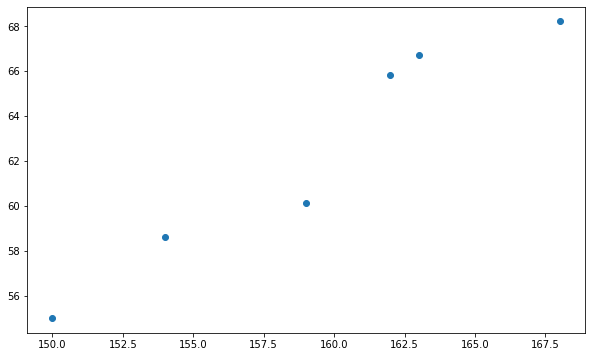

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

heights=np.array([150,154,159,162,163,168],dtype=np.float32).reshape(-1,1)
weights=np.array([55,58.6,60.1,65.8,66.7,68.2],dtype=np.float32).reshape(-1,1)

plt_1=plt.figure(figsize=(10,6))
plt.scatter(heights,weights)
plt.show()

## Data preparation

In [10]:
heights=torch.tensor(heights,dtype=torch.float32)
weights=torch.tensor(weights,dtype=torch.float32)

### Normalization is required

In [8]:
def normalize_height(height):
    height=(height-heights.mean())/heights.std()
    return height

def normalize_weight(weight):
    weight=(weight-weights.mean())/weights.std()
    return weight

### DeNormalization

In [1]:
def denormalize_height(height):
    height=height*heights.std()+heights.mean()
    return height

def denormalize_weight(weight):
    weight=weight*weights.std()+weights.mean()
    return weight

## Design a neural network

In [5]:
model = nn.Linear(1,1,bias=True)

## Training

In [19]:
criterion = nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

num_epochs=1000

for epoch in range(num_epochs):
    # 0.init
    optimizer.zero_grad()

    # 1.forward
    out=model(normalize_height(heights))
    loss=criterion(out,normalize_weight(weights))

    # 2.backward
    loss.backward()
    optimizer.step()

    print(f'epoch [{epoch+1}/{num_epochs}], loss:{loss.item():.6f}',end=' ')
    for name,param in model.named_parameters():
        print(name, param.data.numpy(),end=' ')
    print()

epoch [1/1000], loss:0.054534 weight [[0.96672595]] bias [-1.9649005e-06] 
epoch [2/1000], loss:0.054534 weight [[0.96672595]] bias [-1.970116e-06] 
epoch [3/1000], loss:0.054534 weight [[0.96672595]] bias [-1.9671359e-06] 
epoch [4/1000], loss:0.054534 weight [[0.96672595]] bias [-1.9641557e-06] 
epoch [5/1000], loss:0.054534 weight [[0.96672595]] bias [-1.9693712e-06] 
epoch [6/1000], loss:0.054534 weight [[0.96672595]] bias [-1.966391e-06] 
epoch [7/1000], loss:0.054534 weight [[0.96672595]] bias [-1.9716065e-06] 
epoch [8/1000], loss:0.054534 weight [[0.96672595]] bias [-1.9686263e-06] 
epoch [9/1000], loss:0.054534 weight [[0.96672595]] bias [-1.965646e-06] 
epoch [10/1000], loss:0.054534 weight [[0.96672595]] bias [-1.9708616e-06] 
epoch [11/1000], loss:0.054534 weight [[0.96672595]] bias [-1.9678814e-06] 
epoch [12/1000], loss:0.054534 weight [[0.96672595]] bias [-1.9649012e-06] 
epoch [13/1000], loss:0.054534 weight [[0.96672595]] bias [-1.9701167e-06] 
epoch [14/1000], loss:0.

In [36]:
h = torch.tensor([[181]],dtype=torch.float32)
model.eval()
w=model(normalize_height(h))
print(w)
print(denormalize_weight(w))

tensor([[3.2218]], grad_fn=<AddmmBackward0>)
tensor([[79.3369]], grad_fn=<AddBackward0>)
